# Exercise 2 - Model Training and Evaluation

In [1]:
#imports
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [8]:
import re

#load previously saved artifacts
tfidf = joblib.load("../../../notebooks/artifacts/punctuation_no_stop_words/tfidf_vectorizer.joblib")
best_lr_l2 = joblib.load("../../../notebooks/artifacts/punctuation_no_stop_words/models/logreg_l2_best.joblib")
best_lr_l1 = joblib.load("../../../notebooks/artifacts/punctuation_no_stop_words/models/logreg_l1_best.joblib")
best_mlp   = joblib.load("../../../notebooks/artifacts/punctuation_no_stop_words/models/mlp_best.joblib")

#load data (same splits used earlier)
train_csv = "../data/train.csv"
val_csv   = "../data/val.csv"
test_csv  = "../data/test.csv"

val = pd.read_csv(val_csv)
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

# preprocess (same method applied earlier)
def clean_data(text):
    #check for actual missing values
    if pd.isna(text) or text is None:
        return None
        
    #convert to string and strip whitespace
    text_str = str(text).lower().strip()
    
    #check for literal string "None", "nan", or empty
    if text_str in ['none', 'nan', 'null', '']:
        return None
    
    return text_str

val['text_clean'] = val['Text'].apply(clean_data)
val = val.dropna(subset=['text_clean']).reset_index(drop=True)

X_val = tfidf.transform(val['text_clean'])
y_val = val['Label'].values
feature_names = tfidf.get_feature_names_out()

#target class names
class_names = ["Real", "Fake"]

c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning

## b) Compare L1 vs L2 regularized models: How many features have non-zero weights in each? What does this tell you about feature selection? When would you prefer L1 vs L2 regularization for text classification?

Total features: 5000
Non-zero (L1): 2025
Non-zero (L2): 5000
L1 removed: 2975
L2 removed: 0
L1 non-zero features: 2025
L2 non-zero features: 5000


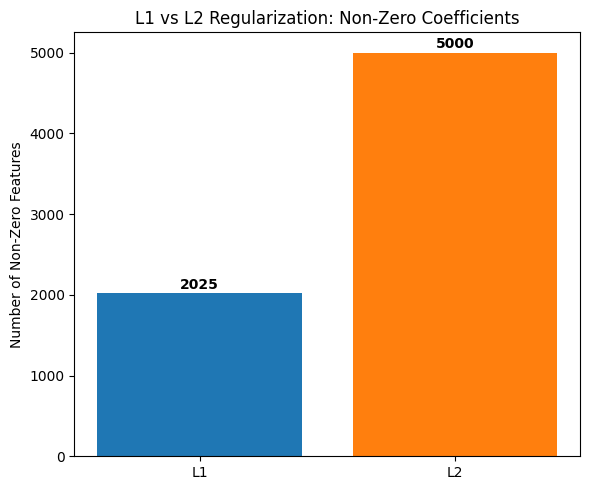

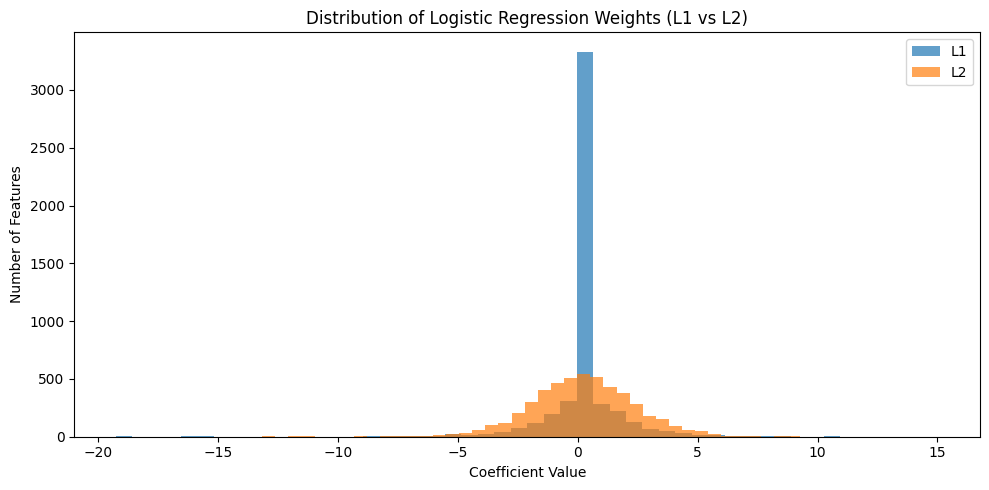

In [ ]:
nz_l2 = np.count_nonzero(best_lr_l2.coef_)
nz_l1 = np.count_nonzero(best_lr_l1.coef_)
total = len(feature_names)

print("Total features:", total)
print("Non-zero (L1):", nz_l1)
print("Non-zero (L2):", nz_l2)
print("L1 removed:", total - nz_l1)
print("L2 removed:", total - nz_l2)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have your best logistic regression models loaded
# best_lr_l1 and best_lr_l2

# Extract coefficients
coef_l1 = best_lr_l1.coef_.flatten()
coef_l2 = best_lr_l2.coef_.flatten()

# Count non-zero weights
non_zero_l1 = np.sum(coef_l1 != 0)
non_zero_l2 = np.sum(coef_l2 != 0)

print(f"L1 non-zero features: {non_zero_l1}")
print(f"L2 non-zero features: {non_zero_l2}")

# ---- Bar chart of non-zero features ----
plt.figure(figsize=(6,5))
plt.bar(['L1', 'L2'], [non_zero_l1, non_zero_l2], color=['#1f77b4', '#ff7f0e'])
plt.ylabel("Number of Non-Zero Features")
plt.title("L1 vs L2 Regularization: Non-Zero Coefficients")
for i, v in enumerate([non_zero_l1, non_zero_l2]):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# ---- Histogram of weight distributions ----
plt.figure(figsize=(10,5))
plt.hist(coef_l1, bins=50, alpha=0.7, label='L1', color='#1f77b4')
plt.hist(coef_l2, bins=50, alpha=0.7, label='L2', color='#ff7f0e')
plt.xlabel("Coefficient Value")
plt.ylabel("Number of Features")
plt.title("Distribution of Logistic Regression Weights (L1 vs L2)")
plt.legend()
plt.tight_layout()
plt.show()
